In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data = pd.read_csv('/content/diabetes.csv')


In [3]:
# Step 2: Data Preprocessing
# Check for missing values (if there are missing values, handle them accordingly)
print("Missing values in the dataset:")
print(data.isnull().sum())

Missing values in the dataset:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [4]:
# Scaling the features (excluding the target 'Outcome')
features = data.drop('Outcome', axis=1)
target = data['Outcome']

In [5]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [8]:
# Step 3: Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)


In [7]:
# Step 4: Train a Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [9]:
# Step 5: Make predictions on the test data
y_pred = logreg.predict(X_test)

In [10]:
# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [11]:
# Print the evaluation metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 75.32%

Confusion Matrix:
[[79 20]
 [18 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



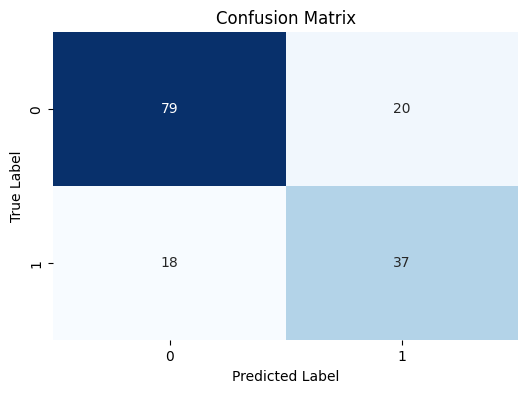

In [12]:
# Optional: Visualize the Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()